In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, ks_2samp, mannwhitneyu
# import seaborn as sns
# from scipy.stats import gaussian_kde
# import numpy as np

In [2]:
df = pd.read_csv("dataset/TRAIN_RELEASE_3SEP2025/train_subtask1.csv")

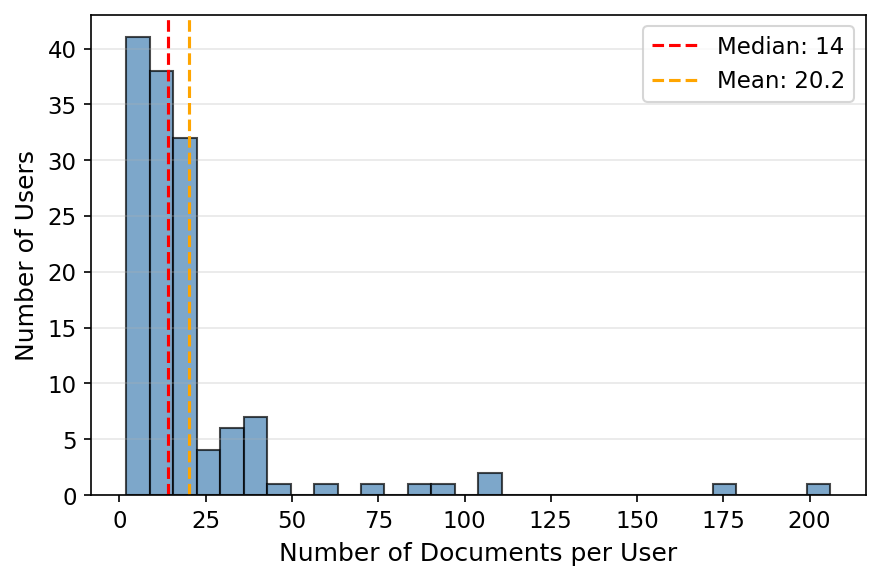

Min: 2
Max: 206
Median: 14.0
Mean: 20.2


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Set style for paper
plt.rcParams.update({
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'figure.dpi': 150
})

# =============================================================================
# Figure 1: Documents per user distribution
# =============================================================================
texts_per_user = df.groupby("user_id").size().reset_index(name="num_texts")

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(texts_per_user['num_texts'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Documents per User')
ax.set_ylabel('Number of Users')
ax.axvline(texts_per_user['num_texts'].median(), color='red', linestyle='--', 
           label=f'Median: {texts_per_user["num_texts"].median():.0f}')
ax.axvline(texts_per_user['num_texts'].mean(), color='orange', linestyle='--', 
           label=f'Mean: {texts_per_user["num_texts"].mean():.1f}')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('fig_docs_per_user.pdf', bbox_inches='tight')
plt.show()

print(f"Min: {texts_per_user['num_texts'].min()}")
print(f"Max: {texts_per_user['num_texts'].max()}")
print(f"Median: {texts_per_user['num_texts'].median()}")
print(f"Mean: {texts_per_user['num_texts'].mean():.1f}")

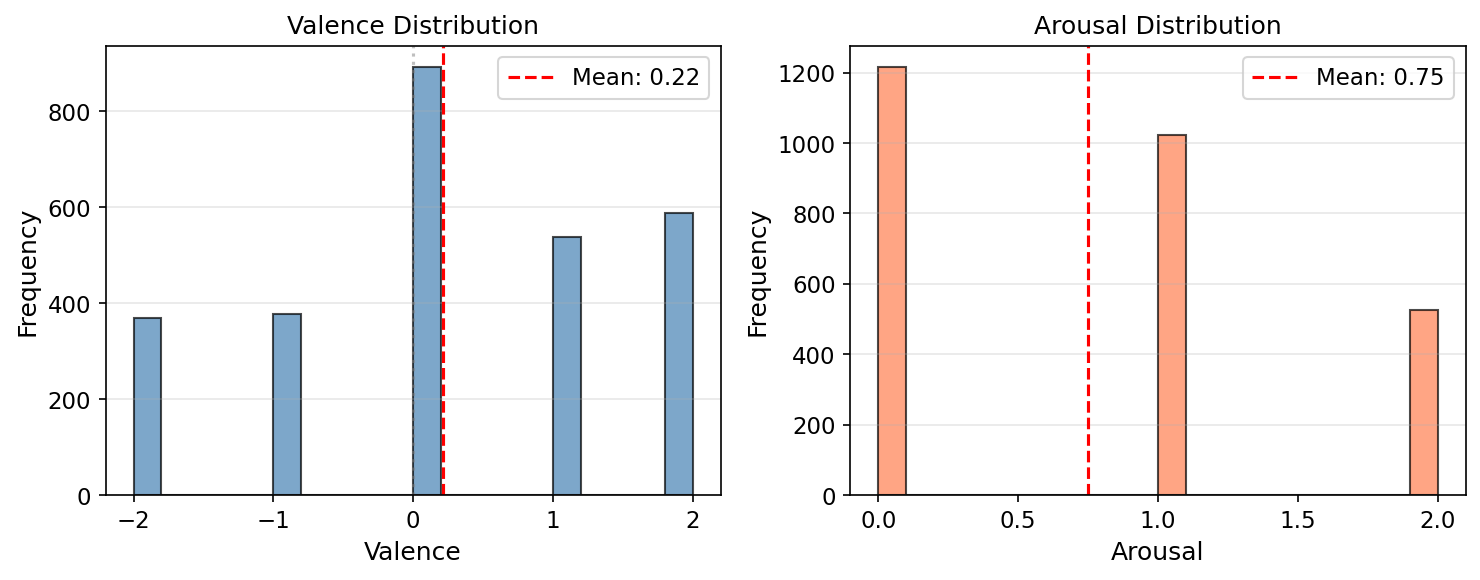

Valence - Range: [-2.0, 2.0], Std: 1.29
Arousal - Range: [0.0, 2.0], Std: 0.75


In [12]:
# =============================================================================
# Figure 2: Valence and Arousal distributions (side by side)
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Valence
axes[0].hist(df['valence'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Valence')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Valence Distribution')
axes[0].axvline(df['valence'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["valence"].mean():.2f}')
axes[0].axvline(0, color='gray', linestyle=':', alpha=0.5)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Arousal
axes[1].hist(df['arousal'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Arousal')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Arousal Distribution')
axes[1].axvline(df['arousal'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["arousal"].mean():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('fig_va_distribution.pdf', bbox_inches='tight')
plt.show()

print(f"Valence - Range: [{df['valence'].min()}, {df['valence'].max()}], Std: {df['valence'].std():.2f}")
print(f"Arousal - Range: [{df['arousal'].min()}, {df['arousal'].max()}], Std: {df['arousal'].std():.2f}")

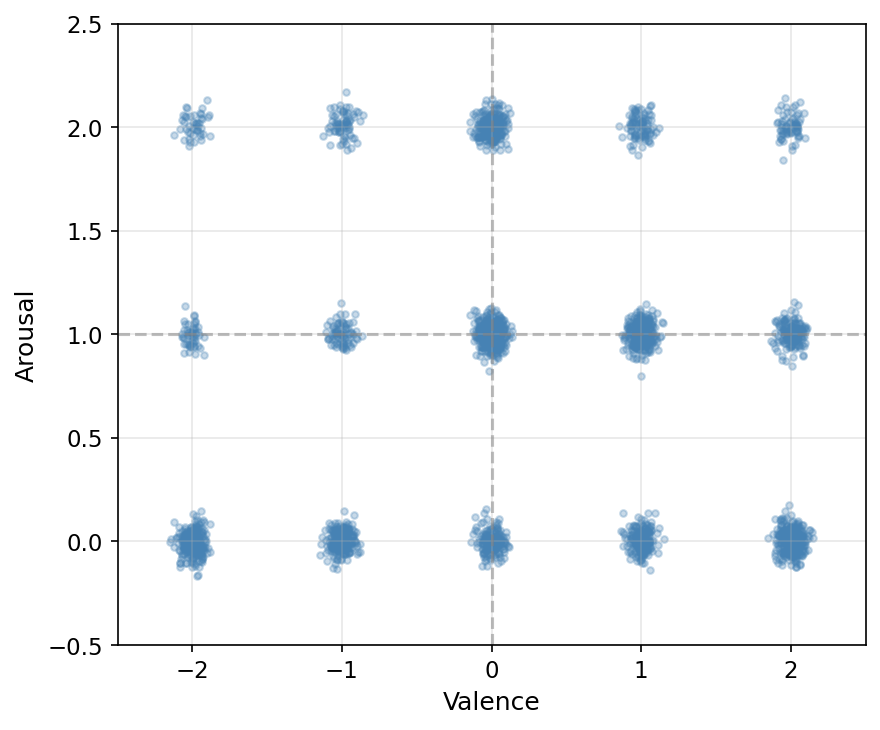

In [13]:
# =============================================================================
# Figure 3 (Optional): V/A scatter with density - SIMPLIFIED
# =============================================================================
fig, ax = plt.subplots(figsize=(6, 5))

# Add jitter for discrete values
jitter_v = df['valence'] + np.random.normal(0, 0.05, len(df))
jitter_a = df['arousal'] + np.random.normal(0, 0.05, len(df))

ax.scatter(jitter_v, jitter_a, alpha=0.3, s=10, c='steelblue')
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0.0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig_va_scatter.pdf', bbox_inches='tight')
plt.show()